In [1]:
import numpy as np
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=0.059879063196079274, pvalue=0.9523123484541982)


In [2]:
import numpy as np
from scipy.stats import describe

x = np.random.normal(size=50)
res = describe(x)

print(res)

DescribeResult(nobs=50, minmax=(-2.5511668761037507, 1.7772593602939395), mean=0.02937722230632724, variance=0.9754504451804601, skewness=-0.12226936632001595, kurtosis=-0.39363575297869824)


In [5]:
from scipy.stats import ttest_ind
x = ([1, 3, 5, 7, 11])
y = ([2, 4, 6, 8, 4])
res = ttest_ind(x, y)
print(res)

Ttest_indResult(statistic=0.30000000000000027, pvalue=0.7718244816824985)


In [6]:
from scipy.interpolate import interp1d

In [8]:
import numpy as np
x = np.array([0., 1.,5., 8., 10.])
y = np.array([0., 4., 1., 6., 8.])

In [11]:
f = interp1d(x, y)
f(3)

array(2.5)

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [13]:
data = sm.datasets.fertility.load_pandas().data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


In [14]:
columns = list(map(str, range(1960, 2012)))
data.set_index('Country Name', inplace=True)
dta = data[columns]
dta = dta.dropna()
dta.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841


(0, 51)

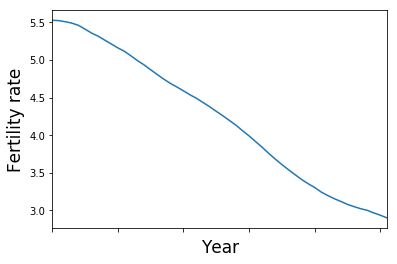

In [15]:
ax = dta.mean().plot(grid=False)
ax.set_xlabel("Year", size=17)
ax.set_ylabel("Fertility rate", size=17);
ax.set_xlim(0, 51)

In [16]:
pca_model = PCA(dta.T, standardize=False, demean=True)

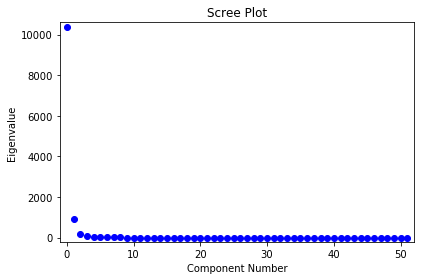

In [17]:
fig = pca_model.plot_scree(log_scale=False)

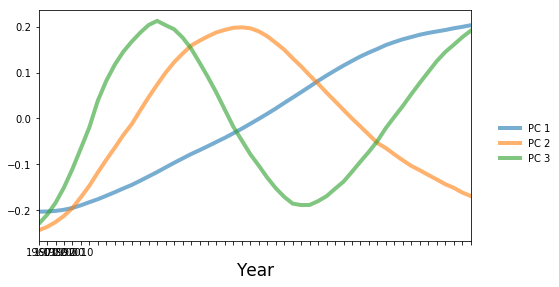

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
lines = ax.plot(pca_model.factors.iloc[:,:3], lw=4, alpha=.6)
ax.set_xticklabels(dta.columns.values[::10])
ax.set_xlim(0, 51)
ax.set_xlabel("Year", size=17)
fig.subplots_adjust(.1, .1, .85, .9)
legend = fig.legend(lines, ['PC 1', 'PC 2', 'PC 3'], loc='center right')
legend.draw_frame(False)

In [19]:
idx = pca_model.loadings.iloc[:,0].argsort()

In [20]:
def make_plot(labels):
    fig, ax = plt.subplots(figsize=(9,5))
    ax = dta.loc[labels].T.plot(legend=False, grid=False, ax=ax)
    dta.mean().plot(ax=ax, grid=False, label='Mean')
    ax.set_xlim(0, 51);
    fig.subplots_adjust(.1, .1, .75, .9)
    ax.set_xlabel("Year", size=17)
    ax.set_ylabel("Fertility", size=17);
    legend = ax.legend(*ax.get_legend_handles_labels(), loc='center left', bbox_to_anchor=(1, .5))
    legend.draw_frame(False)

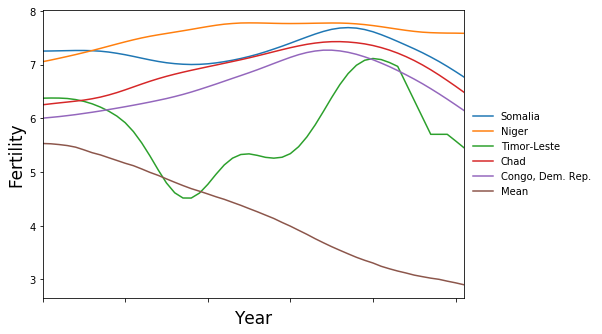

In [21]:
labels = dta.index[idx[-5:]]
make_plot(labels)

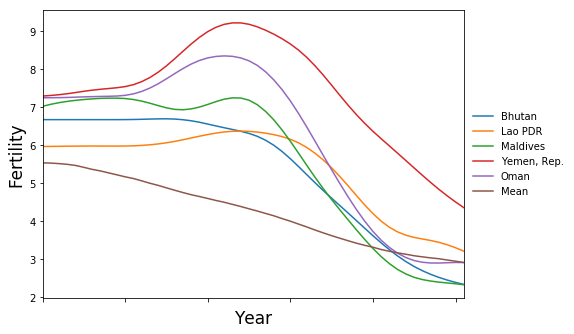

In [22]:
idx = pca_model.loadings.iloc[:,1].argsort()
make_plot(dta.index[idx[-5:]])

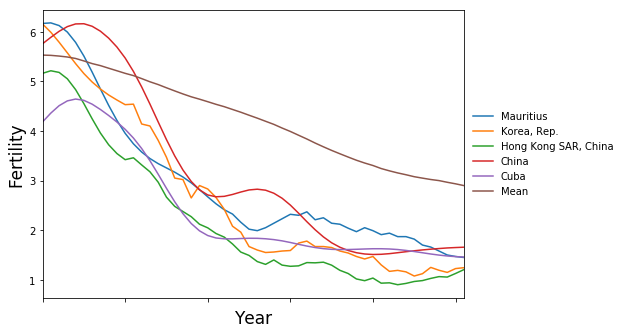

In [23]:
make_plot(dta.index[idx[:5]])

array(['Oman', 'Yemen, Rep.'], dtype=object)

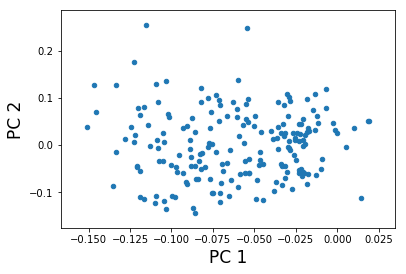

In [24]:
fig, ax = plt.subplots()
pca_model.loadings.plot.scatter(x='comp_00',y='comp_01', ax=ax)
ax.set_xlabel("PC 1", size=17)
ax.set_ylabel("PC 2", size=17)
dta.index[pca_model.loadings.iloc[:, 1] > .2].values

In [25]:

import scipy.integrate
f= lambda x:np.exp(-x**2)
# print results
i = scipy.integrate.quad(f, 0, 1)
print(i)

(0.7468241328124271, 8.291413475940725e-15)


In [28]:
import scipy.integrate
f= lambda x:np.exp(x**1)
# print reults
i = scipy.integrate.quad(f, 1, 2)
print(i)

(4.670774270471606, 5.1856011379043454e-14)


In [30]:
import scipy.io as syio
  
# Save the mat file
n = 14031977
syio.savemat('test.mat', {'test': n})
  
# Load the mat File
matf_contents = syio.loadmat('test.mat')
print(matf_contents)
  
# printing the contents of mat file.
matf_contents = syio.whosmat('test.mat')
print(matf_contents)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Jun 28 16:15:59 2021', '__version__': '1.0', '__globals__': [], 'test': array([[14031977]])}
[('test', (1, 1), 'int32')]


In [31]:
import scipy.io as syio
n = 14031977
syio.savemat('test.mat', {'test': n})
matf_contents = syio.loadmat('test.mat')
print(matf_contents)
matf_contents = syio.whosmat('test.mat')
print(matf_contents)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Jun 28 16:22:25 2021', '__version__': '1.0', '__globals__': [], 'test': array([[14031977]])}
[('test', (1, 1), 'int32')]


In [32]:
import numpy as np
from scipy import stats

arr2 = [[50, 12, 12, 34, 4],
		[12, 11, 10, 34, 21]]

print ("\nZ-score for arr2 : \n", stats.zscore(arr2, axis = 0))
print ("\nZ-score for arr2 : \n", stats.zscore(arr2, axis = 1))



Z-score for arr2 : 
 [[ 1.  1.  1. nan -1.]
 [-1. -1. -1. nan  1.]]

Z-score for arr2 : 
 [[ 1.62005758 -0.61045648 -0.61045648  0.68089376 -1.08003838]
 [-0.61601725 -0.72602033 -0.83602341  1.80405051  0.37401047]]


C:\Users\Azad\miniconda3\envs\da35\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
